### Unsupervised learning: PCA + K-mean clustering

In [1]:
# load libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
# load data
df = pd.read_csv("df_clean.csv", index_col = 0)
brewery_key = pd.read_csv("brewery_key.csv", index_col = 0)
style_key = pd.read_csv("style_key.csv", index_col = 0)
name_key = pd.read_csv("name_key.csv", index_col = 0)

print(len(df))

3360


In [3]:
# inspect data
df.head()

,key,Brewery Key,Style Key,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency_customer,Body_customer,...,Body_description,Alcohol_description,Bitter_description,Sweet_description,Sour_description,Salty_description,Fruits_description,Hoppy_description,Spices_description,Malty_description
0,251,34,8,Richly malty and long on the palate with just ...,5.3,3.65,25,50,13,32,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,252,872,8,This malty full bodied double alt is also know...,7.2,3.90,25,50,12,57,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,253,872,8,Long Trail Ale is full bodied amber ale modele...,5.0,3.58,25,50,14,37,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,255,1019,8,Just cause it dark and German doesn mean it an...,5.3,3.67,25,50,21,69,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5,256,997,8,Called Dark Double Alt on the label Seize the ...,7.2,3.78,25,50,25,51,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
# drop unnecessary columns
df_pca = df.drop(["Description", "Ave Rating",'Astringency_description',
       'Body_description', 'Alcohol_description', 'Bitter_description',
       'Sweet_description', 'Sour_description', 'Salty_description',
       'Fruits_description', 'Hoppy_description', 'Spices_description',
       'Malty_description', 'Min IBU', 'Max IBU', 'ABV'], axis = 1).reset_index(drop=True)
df_pca.head()

,key,Brewery Key,Style Key,Astringency_customer,Body_customer,Alcohol_customer,Bitter_customer,Sweet_customer,Sour_customer,Salty_customer,Fruits_customer,Hoppy_customer,Spices_customer,Malty_customer
0,251,34,8,13,32,9,47,74,33,0,33,57,8,111
1,252,872,8,12,57,18,33,55,16,0,24,35,12,84
2,253,872,8,14,37,6,42,43,11,0,10,54,4,62
3,255,1019,8,21,69,10,63,120,14,0,19,36,15,218
4,256,997,8,25,51,26,44,45,9,1,11,51,20,95


In [5]:
# check NaN values
print(df_pca.isna().any())

key                     False
Brewery Key             False
Style Key               False
Astringency_customer    False
Body_customer           False
Alcohol_customer        False
Bitter_customer         False
Sweet_customer          False
Sour_customer           False
Salty_customer          False
Fruits_customer         False
Hoppy_customer          False
Spices_customer         False
Malty_customer          False
dtype: bool


In [6]:
# scale customer review columns to standardise
features = ['Astringency_customer', 'Body_customer',
       'Alcohol_customer', 'Bitter_customer', 'Sweet_customer',
       'Sour_customer', 'Salty_customer', 'Fruits_customer', 'Hoppy_customer',
       'Spices_customer', 'Malty_customer'] # Features related to tasting profile

# scale feature columns
scaler = MinMaxScaler()
# Scale values by row
scaled_profile_feat = pd.DataFrame(scaler.fit_transform(df_pca[features].T).T, columns=features)
# Scale values by column
scaled_profile_feat = pd.DataFrame(scaler.fit_transform(scaled_profile_feat), columns=features)
# append scaled columns back to the dataframe
df_pca[features] = scaled_profile_feat
df_pca

,key,Brewery Key,Style Key,Astringency_customer,Body_customer,Alcohol_customer,Bitter_customer,Sweet_customer,Sour_customer,Salty_customer,Fruits_customer,Hoppy_customer,Spices_customer,Malty_customer
0,251,34,8,0.117117,0.288288,0.081081,0.423423,0.666667,0.297297,0.0,0.297297,0.513514,0.072072,1.000000
1,252,872,8,0.142857,0.678571,0.214286,0.392857,0.654762,0.190476,0.0,0.285714,0.416667,0.142857,1.000000
2,253,872,8,0.225806,0.596774,0.096774,0.677419,0.693548,0.177419,0.0,0.161290,0.870968,0.064516,1.000000
3,255,1019,8,0.096330,0.316514,0.045872,0.288991,0.550459,0.064220,0.0,0.087156,0.165138,0.068807,1.000000
4,256,997,8,0.255319,0.531915,0.265957,0.457447,0.468085,0.085106,0.0,0.106383,0.531915,0.202128,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,692,755,17,0.077670,0.689320,0.242718,0.456311,1.000000,0.252427,0.0,0.407767,0.271845,0.252427,0.922330
3356,695,1118,17,0.107143,0.221429,0.164286,0.114286,0.385714,0.307143,0.0,0.385714,0.100000,1.000000,0.414286
3357,697,55,17,0.211538,0.701923,0.086538,0.557692,0.836538,0.221154,0.0,0.461538,0.875000,0.423077,1.000000
3358,699,1210,17,0.039062,0.492187,0.226562,0.437500,0.601562,0.109375,0.0,0.210937,0.437500,0.171875,1.000000


In [7]:
# Separating out the features to run PCA
x = df_pca.loc[:, features].values

In [8]:
# fit the standardised data with PCA
pca = PCA()
principalComponents = pca.fit_transform(x)

[0.37799421 0.23239213 0.11972132 0.0906883  0.04645241 0.03765882
 0.03063165 0.02835162 0.01851875 0.01346927 0.00412151]


Text(0, 0.5, 'Cumulative Explained Variance Ratio')

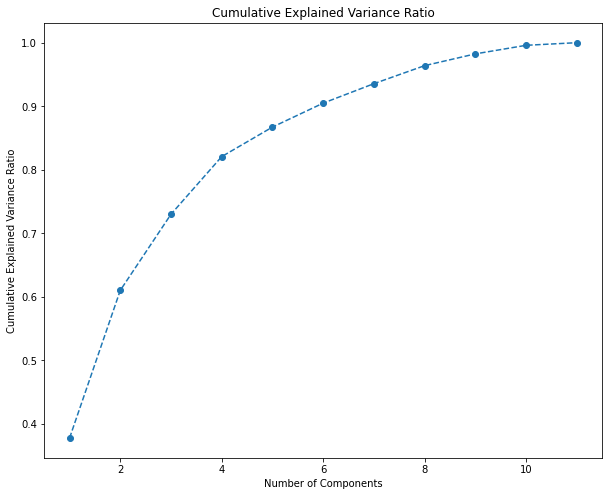

In [9]:
# pick the number of principal components to keep
print(pca.explained_variance_ratio_)

# plot the cumulative explained variance ratio
plt.figure(figsize = (10,8))
plt.plot(range(1, 12), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

In [17]:
# keep 2 components to create a 2D visualisation for clustering
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [18]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
print(pca.explained_variance_ratio_.sum())

[0.26673079 0.163987  ]
[0.37799421 0.23239213]
[0.37799421 0.61038634]
0.6103863436648851


#### Part 1: PCA - grouping companies based on beer style

In [19]:
finalDf1 = pd.concat([principalDf, df_pca[['Brewery Key', 'key', 'Style Key']]], axis = 1)
finalDf1

,pc1,pc2,Brewery Key,key,Style Key
0,-0.226398,0.079398,34,251,8
1,-0.394875,-0.058436,872,252,8
2,-0.471491,0.474147,872,253,8
3,-0.464342,-0.256686,1019,255,8
4,-0.515950,0.089392,997,256,8
...,...,...,...,...,...
3355,-0.280245,-0.242874,755,692,17
3356,0.165062,-0.582353,1118,695,17
3357,-0.305860,0.319652,55,697,17
3358,-0.450377,-0.031183,1210,699,17


In [20]:
# clustering analysis using K-means
inertia = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(principalDf)
    inertia.append(np.sqrt(kmeans.inertia_))

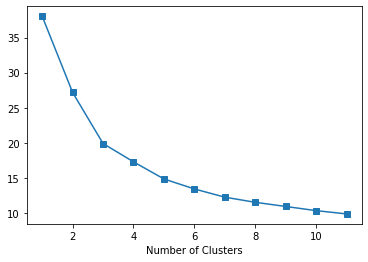

In [21]:
plt.plot(range(1, 12), inertia, marker='s');
plt.xlabel('Number of Clusters')
plt.show()

In [22]:
# pick 4 clusters
kmeans_pca = KMeans(n_clusters=4, random_state=1).fit(principalDf)

In [23]:
# combine the clustering results with the PCA result
finalDf1_kmeans=pd.DataFrame(finalDf1).copy()
finalDf1_kmeans["Labels"]=kmeans_pca.labels_
kmeans1_labels = np.unique(finalDf1_kmeans['Labels'])

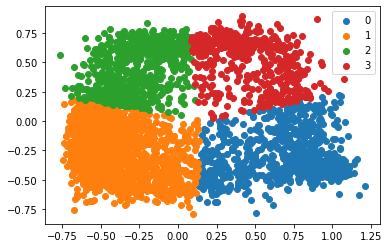

In [24]:
#plotting the results:
for i in kmeans1_labels:
    plt.scatter(finalDf1_kmeans.loc[finalDf1_kmeans['Labels'] == i, 'pc1'] , finalDf1_kmeans.loc[finalDf1_kmeans['Labels'] == i, 'pc2'] , label = i)
plt.legend()
plt.show()

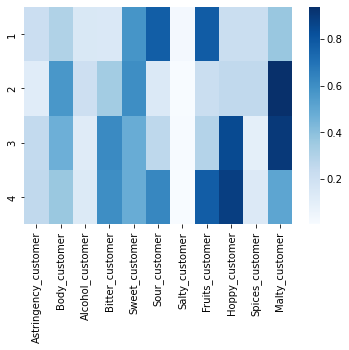

In [25]:
# with pca
# combine kmeans clustering results with original df (full features info)
x = pd.DataFrame(x, columns=features)
beer_kmeans1_pca=pd.DataFrame(x).copy()
beer_kmeans1_pca["Labels"]=kmeans_pca.labels_

beer_kmeans1_pca=beer_kmeans1_pca.groupby(beer_kmeans1_pca["Labels"]).mean().reset_index()
beer_kmeans1_pca=beer_kmeans1_pca.drop(columns=["Labels"]).set_index(np.arange(1,5))
sns.heatmap(beer_kmeans1_pca,cmap="Blues")
plt.show()

**interpretation**
- cluster 1: sour, fruity, sweet  -  ale
- cluster 2: fuller body, sweet, malty  - stout
- cluster 3: hoppy, mallty, bitter  - lager, pilsner
- cluster 4: hoppy, fruity, sour, bitter  - IPA


In [26]:
# check beer style vs cluster
# combine kmeans clustering results with original df (full features info)
cluster_style=pd.DataFrame(df_pca).copy()
cluster_style["Labels"]=kmeans_pca.labels_
cluster_style = cluster_style.groupby(["Labels", "Style Key"])['key'].count().reset_index()
cluster_style = pd.merge(cluster_style, style_key, left_on = 'Style Key', right_on = 'Style Key', how = 'left')

In [29]:
cluster_style_1 = cluster_style.loc[cluster_style['Labels'] == 0, :].sort_values(['key'], ascending=False)
cluster_style_1.head(10)

,Labels,Style Key,key,Style
67,0,126,48,Wild Ale
63,0,122,42,Sour - Berliner Weisse
65,0,124,39,Sour - Flanders Red Ale
64,0,123,37,Sour - Flanders Oud Bruin
66,0,125,37,Sour - Gose
32,0,77,35,Fruit and Field Beer
17,0,45,32,Farmhouse Ale - Saison
60,0,119,32,Lambic - Fruit
61,0,120,30,Lambic - Gueuze
13,0,38,27,IPA - New England


In [30]:
cluster_style_2 = cluster_style.loc[cluster_style['Labels'] == 1, :].sort_values(['key'], ascending=False)
cluster_style_2.head(10)

,Labels,Style Key,key,Style
134,1,89,47,Stout - American Imperial
140,1,95,43,Stout - Sweet / Milk
138,1,93,42,Stout - Oatmeal
118,1,71,40,Porter - Imperial
76,1,11,38,Brown Ale - English
139,1,94,38,Stout - Russian Imperial
119,1,72,35,Porter - Robust
120,1,73,34,Porter - Smoked
74,1,9,33,Brown Ale - American
117,1,70,32,Porter - English


In [31]:
cluster_style_3 = cluster_style.loc[cluster_style['Labels'] == 2, :].sort_values(['key'], ascending=False)
cluster_style_3.head(10)

,Labels,Style Key,key,Style
187,2,51,34,Red Ale - American Amber / Red
175,2,34,33,IPA - Black / Cascadian Dark Ale
194,2,59,31,Lager - Helles
200,2,65,29,Pilsner - German
179,2,41,28,Bitter - English Extra Special / Strong Bitter...
190,2,55,25,Lager - American
199,2,64,24,Pilsner - Bohemian / Czech
196,2,61,23,Lager - Kellerbier / Zwickelbier
222,2,101,23,Red Ale - Imperial
211,2,85,19,Rye Beer


In [32]:
cluster_style_4 = cluster_style.loc[cluster_style['Labels'] == 3, :].sort_values(['key'], ascending=False)
cluster_style_4.head(10)

,Labels,Style Key,key,Style
243,3,37,44,IPA - Imperial
238,3,32,39,IPA - American
261,3,60,35,Lager - India Pale Lager (IPL)
253,3,48,30,Pale Ale - American
239,3,33,29,IPA - Belgian
241,3,35,23,IPA - Brut
244,3,38,23,IPA - New England
280,3,111,19,Wheat Beer - American Pale
248,3,43,17,Blonde Ale - American
242,3,36,16,IPA - English
